In [2]:
#from urllib.request import urlopen
import spacy
from spacy.cli import link
from spacy.util import get_package_path
from gensim.models import LsiModel

model_name = "de_core_news_sm"
package_path = get_package_path(model_name)
link(model_name, model_name, force=True, model_path=package_path)
nlp = spacy.load("de_core_news_sm")

import operator
import numpy as np
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim import corpora, models
from pprint import pprint
import seaborn as sns
import pyLDAvis.gensim
pd.set_option('display.max_colwidth', 80)
pd.options.display.max_columns=500

✔ Linking successful
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\de_core_news_sm
-->
c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\spacy\data\de_core_news_sm
You can now load the model via spacy.load('de_core_news_sm')


In [3]:
newdf= pd.read_csv(r"../out/Polizeiberichte_transformed.csv", sep=";", encoding="UTF-8")
newdf.drop_duplicates()

,Timestamp,Ueberschrift,Hauptartikel,Link,Ort,Sekundaerer Ort,Loc1,Loc2,Loc3,Loc4,Author,Ueberschrift_clean,Ueberschrift_lem,Ueberschrift_lem_no_stop,Ueberschrift_split,Ueberschrift_clean2,Ueberschrift_lem2,Ueberschrift_lem_clean2,Ueberschrift_lem_clean_no_stop,Ueberschrift_kombi,Hauptartikel_clean,Hauptartikel_lem,Hauptartikel_lemm_clean,Hauptartikel_lem_clean_no_stop
0,2019-04-30 13:34:00,: inbrandsetzung von sperrmüll polizei sucht zeugen!,(ne) Am frühen Samstagmorgen um kurz vor 6:00 Uhr hatte eine als Sperrmüll ...,https://www.presseportal.de/blaulicht/pm/4970/4258550,heddernheim,NaN,heddernheim,NaN,NaN,NaN,ne,inbrandsetzung von sperrmüll polizei sucht zeugen,inbrandsetzung von sperrmüll polizei suchen zeugen,inbrandsetzung sperrmüll,Inbrand Setzung Sperr Müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll inbrandsetzung sperrmüll,ne am frühen samstagmorgen um kurz vor uhr hatte eine als sperrmüll abg...,ne am früh samstagmorgen um kurz vor uhr haben einen als sperrmüll a...,ne am früh samstagmorgen um kurz vor uhr haben einen als sperrmüll a...,sperrmüll abgestellt küche grundstück straße brennen erheblich schaden euro...
1,2019-04-30 13:33:00,: zwei autos abgebrannt,(ka) In der Nacht von Montag auf Dienstag brannten zwei Autos in der Ilbens...,https://www.presseportal.de/blaulicht/pm/4970/4258547,bornheim,NaN,bornheim,NaN,NaN,NaN,ka,zwei autos abgebrannt,zwei autos abbrennen,autos abbrennen,Autos Abb Rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen autos abbrennen,ka in der nacht von montag auf dienstag brannten zwei autos in der ilbens...,ka in der nacht von montag auf dienstag brennen zwei autos in der ilben...,ka in der nacht von montag auf dienstag brennen zwei autos in der ilben...,brennen autos ilbenstädter straße ecke nußbaumstraße mitternacht melden anr...
2,2019-04-30 08:54:00,: lastwagenfahrer fährt auf polizisten zu und versucht zu flüchten,(ka) Gestern Abend konnte ein Polizeibeamter auf der A5 in letzter Sekunde ...,https://www.presseportal.de/blaulicht/pm/4970/4257970,bundesautobahn,NaN,bundesautobahn,NaN,NaN,NaN,ka,lastwagenfahrer fährt auf polizisten zu und versucht zu flüchten,lastwagenfahrer fahren auf polizisten zu und versuchen zu flüchten,lastwagenfahrer fahren polizisten versuchen flüchten,Lastwagen Fahrer Ver Suchen,lastwagen fahrer ver suchen,lastwagen fahrer ver suchen,lastwagen fahrer ver suchen,lastwagen fahrer,lastwagen fahrer lastwagenfahrer fahren polizisten versuchen flüchten,ka gestern abend konnte ein polizeibeamter auf der a in letzter sekunde ...,ka gestern abend können einen polizeibeamter auf der a in letzt sekun...,ka gestern abend können einen polizeibeamter auf der a in letzt sekun...,polizeibeamter sekunde zufahrenden lastwagen wegspringen fahrer begehen unf...
3,2019-04-30 08:40:00,: bauarbeiter schwer verletzt,(em) Gestern Nachmittag (29.04.2019) wurde ein 35-jähriger Arbeiter auf ein...,https://www.presseportal.de/blaulicht/pm/4970/4257955,bahnhofsviertel,NaN,bahnhofsviertel,NaN,NaN,NaN,em,bauarbeiter schwer verletzt,bauarbeiter schwer verletzen,bauarbeiter schwer verletzen,Bau Arbeiter Sch Wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter,bau arbeiter bauarbeiter schwer verletzen,em gestern nachmittag wurde ein jähriger arbeiter auf einer baustelle ...,em gestern nachmittag werden einen jährig arbeiter auf einer baust...,em gestern nachmittag werden einen jährig arbeiter auf einer baust...,arbeiter baustelle elbestraße schwer verletzen umbauarbeiten beschäftigen me...
4,2019-04-29 11:17:00,: fahrradcodieraktion zum frühlingsfest,(ne)Das 6. Polizeirevier wird im Rahmen eines Frühlingsfestes vom Seniorenw...,https://www.presseportal.de/blaulicht/pm/4970/4256984,bornheim,NaN,bornheim,NaN,NaN,NaN,ne,fahrradcodieraktion zum frühlingsfest,fahrradcodieraktion zum frühlingsfest,fahrradcodieraktion frühlingsfest,Frühlings Fest

In [4]:
newdf["Comb_all"] = newdf["Hauptartikel_lem_clean_no_stop"]+" "+ newdf["Ueberschrift_kombi"]

In [5]:
newdf["Hauptartikel_lem_clean_no_stop"].isnull().sum()

0

In [6]:
newdf['Ueberschrift_kombi'].isnull().sum()

0

In [7]:
newdf["Author"].value_counts()

fue      1052
em        714
ka        560
mc        509
ne        473
as        397
re        164
va        139
we        137
sky        56
ts         41
cje        13
kie        13
le         12
tb         10
be          9
md          8
pe          7
me          5
an          5
nk          5
hol         5
ak          5
sms         5
ki          4
he          4
hs          3
fu          3
mj          2
dwe         2
lö          2
emas        2
reem        2
jhem        1
emne        1
emgf        1
kam         1
lt          1
emki        1
ab          1
cjeem       1
kk          1
fs          1
mf          1
ds          1
jl          1
Name: Author, dtype: int64

In [8]:
newdf["Ort"].value_counts()

innenstadt                 582
sachsenhausen              553
bundesautobahn             546
bahnhofsviertel            527
nordend                    347
gallus                     303
stadtgebiet                285
ostend                     254
bornheim                   248
bockenheim                 248
westend                    235
niederursel                168
griesheim                  157
höchst                     150
heddernheim                141
fechenheim                 138
eschersheim                137
rödelheim                  134
dornbusch                  130
ginnheim                   123
gutleutviertel             122
eckenheim                  120
niederrad                  120
schwanheim                 107
praunheim                  105
bergen                     104
preungesheim                94
nied                        86
flughafen                   81
altstadt                    81
                          ... 
bornheimnordend              1
lkw     

In [10]:
newdf['Timestamp'] =  pd.to_datetime(newdf['Timestamp'])
newdf['Hours'] = (newdf['Timestamp'].dt.minute + newdf['Timestamp'].dt.hour*60)/60
newdf['day'] = newdf['Timestamp'].dt.day
newdf['weekday'] = newdf['Timestamp'].dt.weekday
newdf['year'] = newdf['Timestamp'].dt.year

In [12]:
newdf['year'].value_counts()

2017    1320
2018    1249
2016    1186
2013    1146
2015     993
2014     903
2012     442
2019     439
Name: year, dtype: int64

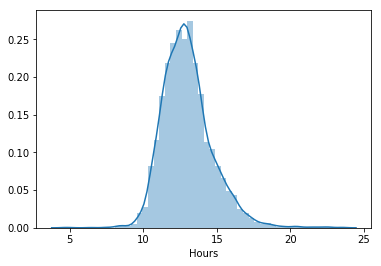

In [259]:
sns.distplot(newdf['Hours'])

(1, 30)

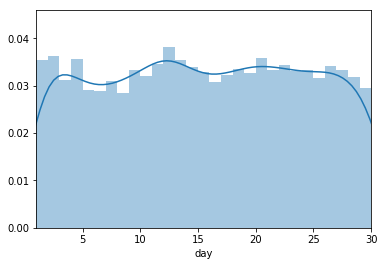

In [260]:
bins=np.arange(newdf['day'].min(), newdf['day'].max() + 1)
sns.distplot(newdf['day'], bins=bins)
plt.xlim(1, 30)

(0, 6)

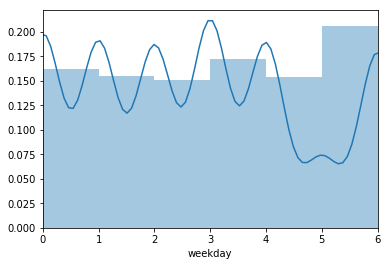

In [261]:
bins=np.arange(newdf['weekday'].min(), newdf['weekday'].max() + 1)
sns.distplot(newdf['weekday'], bins= bins)
plt.xlim(0, 6)

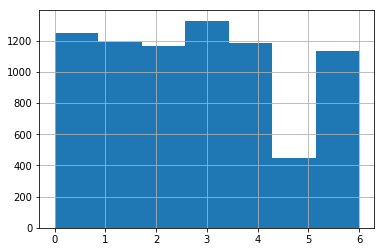

In [262]:
newdf['weekday'].hist(bins=7)

In [263]:
def getElement(Liste):
    return ' '.join(Liste)
newdf["Ueberschrift_kombi"] = newdf["Ueberschrift_kombi"].apply(lambda x: [item for item in x.split()])
newdf["Hauptartikel_lem_clean_no_stop"] = newdf["Hauptartikel_lem_clean_no_stop"].apply(lambda x: [item for item in x.split()])
newdf["Comb_all"] = newdf["Comb_all"].apply(lambda x: [item for item in x.split()])


In [264]:
# be sure to split sentence before feed into Dictionary
#dataset = [d.split() for d in dataset]

dataset = newdf["Hauptartikel_lem_clean_no_stop"]
dataset_head = newdf["Ueberschrift_kombi"]
dataset_all = data = newdf["Comb_all"]

vocab = gensim.corpora.Dictionary(dataset)
vocab_heads = gensim.corpora.Dictionary(dataset_head)
vocab_all = gensim.corpora.Dictionary(dataset_all)

bow_corpus = [vocab.doc2bow(doc) for doc in dataset]
bow_corpus_heads = [vocab.doc2bow(doc) for doc in dataset_head]
bow_corpus_all = [vocab.doc2bow(doc) for doc in dataset_all]

tfidf = models.TfidfModel(bow_corpus)
tfidf_head = models.TfidfModel(bow_corpus_heads)
tfidf_all = models.TfidfModel(bow_corpus_all)

corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf_head = tfidf[bow_corpus_heads]
corpus_tfidf_all = tfidf[bow_corpus_all]


data = newdf["Comb_all"].apply(getElement)

In [265]:
def getMyTopic(row, Model):
    bow = vocab.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[0]

def getMyTopic1(row, Model):
    bow = vocab.doc2bow(row)
    Topic = max((Model[bow]), key= lambda x: x[1])
    return Topic[1]


In [266]:
#Safe as Excel
#newdf.to_excel(r"C:\Users\Markus.Haftstein.ADASTRACORPNET\PycharmProjects\polizeiberichte_scraper\MYDF.xlsx")

In [267]:
ldamodel = LdaModel(corpus=bow_corpus_all, num_topics=7, id2word=vocab_all)
hdpmodel = HdpModel(corpus=bow_corpus_all, id2word=vocab_all)
lsimodel = LsiModel(corpus=corpus_tfidf, num_topics=7, id2word=vocab)
lsimodelUpdate = models.LsiModel(corpus_tfidf, id2word=vocab, num_topics=7)
lsimodelUpdate.add_documents(corpus_tfidf_head, decay=0.5)  # now LSI has been trained on tfidf_corpus + another_tfidf_corpus
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_all, num_topics=7, id2word=vocab, passes=2, workers=4)


c:\users\thomas.zoellinger\appdata\local\programs\python\python37\lib\site-packages\gensim\models\hdpmodel.py:467: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  start_time = time.clock()


In [268]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
lsitopics_update = [[word for word, prob in topic] for topicid, topic in lsimodelUpdate.show_topics(formatted=False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lda_model_tfidf_topics = [[word for word, prob in topic] for topicid, topic in lda_model_tfidf.show_topics(formatted=False)]


lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=newdf["Comb_all"], dictionary=vocab_all, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=newdf["Comb_all"], dictionary=vocab_all, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=newdf["Comb_all"], dictionary=vocab_all, window_size=10).get_coherence()
lsi_coherence_Update = CoherenceModel(topics=lsitopics_update[:10], texts=newdf["Comb_all"], dictionary=vocab_all, window_size=10).get_coherence()
lda_model_tfidf_coher = CoherenceModel(topics=lda_model_tfidf_topics, texts=newdf["Comb_all"], dictionary=vocab_all, window_size=10).get_coherence()

In [269]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

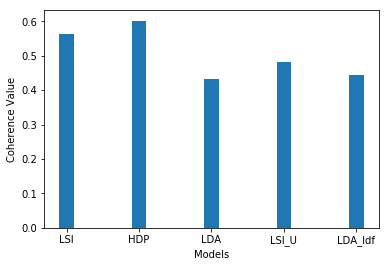

In [270]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence,lsi_coherence_Update,lda_model_tfidf_coher],
                   ['LSI', 'HDP', 'LDA', "LSI_U", "LDA_Idf"])

In [122]:
#pyLDAvis.enable_notebook()
#pyLDAvis.gensim.prepare(ldamodel, bow_corpus, vocab)

In [271]:
newdf["Topic_LSI_Update"] = newdf["Comb_all"].apply(getMyTopic, args=[lsimodelUpdate])
newdf["Prob_LSI_Update"] = newdf["Comb_all"].apply(getMyTopic1,args=[lsimodelUpdate])
newdf["Topic_LSI"] = newdf["Comb_all"].apply(getMyTopic, args=[lsimodel])
newdf["Prob_LSI"] = newdf["Comb_all"].apply(getMyTopic1,args=[lsimodel])

In [272]:
#Safe as Excel
newdf.to_excel(r"C:\Users\Thomas.Zoellinger\Downloads\MYDF1.xlsx")

In [274]:
newdf["Hauptartikel_lem_clean_no_stop"] =newdf["Hauptartikel_lem_clean_no_stop"] .apply(getElement)
newdf["Ueberschrift_kombi"] =newdf["Ueberschrift_kombi"] .apply(getElement)

In [275]:
def getWordsCount(Col,Num):
    return pd.Series(' '.join(Col).lower().split()).value_counts()[:Num]

In [276]:
newdf_author = newdf[newdf["Author"].isin(["as", "em", "fue", "ka", "mc", "ne", "re", "va", "we"])]
grouped =newdf_author.groupby(['Author'],group_keys=False )

In [280]:
author_words = round(grouped["Hauptartikel_lemm_clean"].apply(getWordsCount, Num=200) / grouped["Hauptartikel_lemm_clean"].count(),2)

In [283]:
Word_Freq_Author = pd.DataFrame(author_words).unstack()
Word_Freq_Author.dropna(thresh=len(Word_Freq_Author) - 3, axis=1)

Hauptartikel_lemm_clean                                      \
                             a    ab   als   alt    am    an ander   
Author                                                               
as                        0.18   NaN  0.52  0.28  1.07  0.79  0.23   
em                        0.23  0.11  0.57  0.31  0.77  1.28  0.26   
fue                       1.83   NaN  0.39  0.22  1.06  0.69  0.10   
ka                        0.20  0.13  0.51  0.37  0.94  0.82  0.14   
mc                        0.11  0.12  0.64  0.29  1.06  0.83  0.19   
ne                        0.10  0.10  0.72  0.36  0.67  0.77  0.15   
re                        0.28  0.15  0.22  0.95  0.65  0.82  0.14   
va                         NaN  0.09  0.44  0.51  0.85  0.76  0.15   
we                        0.18   NaN  0.39  0.47  1.02  0.67  0.31   

                                                                           \
       anschließen  auch   auf   aus  auto   bab bargeld beamten befinden   
Author                                                                      
as            0.09  0.24  1.13  0.56   NaN  0.08    0.11    0.17      NaN   
em            0.25  0.32  1.53  0.48  0.12  0.38    0.13    0.25      NaN   
fue            NaN  0.35  1.11  0.59   NaN  1.90    0.12    0.11     0.22   
ka            0.31  0.19  1.84  0.56  0.26  0.18    0.21    0.45     0.16   
mc             NaN  0.28  1.61  0.66   NaN  0.14    0.11    0.27     0.09   
ne            0.29  0.49  1.17  0.73  0.18   NaN    0.18    0.48      NaN   
re            0.11  0.46  1.42  0.68  0.10  0.32    0.15     NaN     0.17   
va            0.19  0.21  1.27  0.71  0.10   NaN    0.16     NaN     0.14   
we            0.26  0.43  1.43  0.61  0.13  0.36    0.28    0.18     0.15   

                                                                              \
         bei  beid beschreiben beute   bis bislang bleiben    cm dabei  dass   
Author                                                                         
as      0.63  0.44        0.14  0.11  0.24    0.19    0.12   NaN  0.13  0.26   
em      0.43  0.54         NaN   NaN  0.26    0.15    0.11  0.12  0.29  0.50   
fue     0.45  0.28        0.15   NaN  0.10    0.24     NaN  0.19  0.32  0.20   
ka      0.53  0.33        0.25  0.18  0.39     NaN    0.11  0.32  0.11  0.29   
mc      0.55  0.23        0.14  0.09  0.17    0.12     NaN   NaN  0.10  0.33   
ne      0.56  0.54        0.13  0.10  0.16    0.13    0.11  0.16  0.23  0.35   
re      0.67  0.30         NaN   NaN  0.34    0.16    0.12  0.16  0.23  0.30   
va      0.56  0.50        0.09  0.09  0.35     NaN    0.11  0.37  0.25  0.23   
we      0.75  0.50         NaN  0.13  0.34    0.18    0.12  0.34  0.12  0.24   

                                                                         \
          der  dies  dort  drei dunkel durch   ein einen einer entgegen   
Author                                                                    
as      12.04  0.46  0.09  0.23   0.08  0.19  0.75  2.32  1.54     0.09   
em      16.86  0.76  0.22  0.24   0.11  0.25  0.90  2.75  1.91     0.22   
fue     12.77  0.49  0.33  0.14   0.14  0.32  0.75  2.24  1.17      NaN   
ka      16.27  0.82  0.22  0.23   0.25  0.43  0.97  2.56  1.27     0.31   
mc      14.76  0.58  0.09  0.22   0.13  0.34  1.05  2.38  1.82      NaN   
ne      15.80  0.57   NaN  0.27   0.13  0.33  1.07  2.52  1.48     0.10   
re      15.40  0.46  0.15  0.15    NaN  0.48  1.07  2.38  1.70     0.18   
va      13.04  0.52  0.19  0.19   0.29  0.27  1.12  2.92  1.81     0.31   
we      14.53  0.40   NaN  0.19   0.19  0.31  0.91  2.46  1.85     0.13   

                                                                          \
       ermittlungen  etwa  euro fahren fahrer fahrzeug festnehmen finden   
Author                                                                     
as             0.17  0.38  0.45   0.11   0.17      NaN       0.18   0.17   
em             0.68  0.32  0.32   0.18   0.24     0.24       0.32   0.14   

In [279]:
grouped_LSI =newdf.groupby(['Topic_LSI_Update'],group_keys=False )
topic_words = grouped_LSI["Ueberschrift_kombi"].apply(getWordsCount,Num=5)
pd.DataFrame(topic_words)

Ueberschrift_kombi
Topic_LSI_Update                                               
0                unfall                                     880
                 verkehrs                                   711
                 verkehrsunfall                             708
                 schwer                                     472
                 verletzen                                  294
1                geschwindigkeits                           270
                 messungen                                  268
                 geschwindigkeitsmessungen                  267
                 kontrollen                                   3
                 geschwindigkeitskontrollen                   3
2                raub                                       667
                 straßen                                    122
                 kiosk                                      102
                 straßenraub                                 96
                 überfall                                    80
3                trick                                      368
                 diebstahl                                  335
                 trickdiebstahl                             153
                 dieb                                       152
                 diebe                                      138
4                fest                                       655
                 festnehmen                                 596
                 dieb                                       267
                 einbrecher                                 224
                 brecher                                    188
5                brand                                      471
                 pkw                                        428
                 einbruch                                   134
                 bruch                                      129
                 festnahme                                  126
6                diebe                                        2
                 einbruch                                     1
                 wohnungseinbruch                             1
                 uten                                         1
                 wohnungs                                     1

In [171]:
newdf.count()

Timestamp                         8073
Ueberschrift                      8068
Hauptartikel                      8073
Link                              8073
Datum                                0
Ort                               7687
Sekundaerer Ort                    940
Author                            4595
Ueberschrift_clean                8068
Ueberschrift_lem                  8068
Ueberschrift_lem_no_stop          8053
Ueberschrift_split                8073
Ueberschrift_clean2               8073
Ueberschrift_lem2                 8073
Ueberschrift_lem_clean2           8073
Ueberschrift_lem_clean_no_stop    7349
Ueberschrift_kombi                8073
Hauptartikel_clean                8073
Hauptartikel_lem                  8073
Hauptartikel_lemm_clean           8073
Hauptartikel_lem_clean_no_stop    8073
Comb_all                          8073
Hours                             8073
day                               8073
weekday                           8073
Topic_LSI_Update         

In [185]:
themenfilter = open("../resources/Themenfilter.txt", "r")
themenfilter= pd.Series(themenfilter)
themenfilter = themenfilter.replace('\n','', regex=True)
newdf = newdf[~newdf['Ueberschrift_clean'].isin(themenfilter)]

In [188]:
newdf.count()

Timestamp                         8072
Ueberschrift                      8067
Hauptartikel                      8072
Link                              8072
Datum                                0
Ort                               7687
Sekundaerer Ort                    940
Author                            4594
Ueberschrift_clean                8067
Ueberschrift_lem                  8067
Ueberschrift_lem_no_stop          8052
Ueberschrift_split                8072
Ueberschrift_clean2               8072
Ueberschrift_lem2                 8072
Ueberschrift_lem_clean2           8072
Ueberschrift_lem_clean_no_stop    7348
Ueberschrift_kombi                8072
Hauptartikel_clean                8072
Hauptartikel_lem                  8072
Hauptartikel_lemm_clean           8072
Hauptartikel_lem_clean_no_stop    8072
Comb_all                          8072
Hours                             8072
day                               8072
weekday                           8072
Topic_LSI_Update         

In [222]:
TopicFilter = "Themenfilter.txt"

Themenfilter = open(r"../resources/%s" % TopicFilter, "r")
Themenfilter = list(Themenfilter)
Themenfilter = list(map(lambda s: s.strip(), Themenfilter))
Themenfilter

['informationsveranstaltung',
 'pressekonferenz',
 'präventionsveranstaltung',
 'frühlingskonzert',
 'polizeipräsidium',
 'die polizei informiert',
 'pressemeldung',
 'pressemitteilun',
 'presse',
 'nachtrag',
 'nachmeldung',
 'fazit',
 'korrekturmeldung',
 'verkehrshinweise',
 'speedmarathon',
 'pressevertreter',
 'nachwuchswerbung',
 'hinweise zum bundesligaspiel',
 'erreichbarkeit',
 'themenabonnement',
 'pressegespräch',
 'sicherheitskonzept',
 'blitzmarathon',
 'in eigener sache',
 'korrektur',
 'informationsstand',
 'die polizei informiert',
 'präventionstag']

In [238]:
Test =newdf[~newdf["Ueberschrift"].str.lower().str.contains('|'.join(Themenfilter),na=False)]

In [247]:
def FilterTopics(DF,Column_Name, Filterwords_List):
    return DF[~DF[Column_Name].str.lower().str.contains('|'.join(Filterwords_List),na=False)]

In [248]:
FilterTopics(newdf,"Ueberschrift",Themenfilter )

,Timestamp,Ueberschrift,Hauptartikel,Link,Datum,Ort,Sekundaerer Ort,Author,Ueberschrift_clean,Ueberschrift_lem,Ueberschrift_lem_no_stop,Ueberschrift_split,Ueberschrift_clean2,Ueberschrift_lem2,Ueberschrift_lem_clean2,Ueberschrift_lem_clean_no_stop,Ueberschrift_kombi,Hauptartikel_clean,Hauptartikel_lem,Hauptartikel_lemm_clean,Hauptartikel_lem_clean_no_stop,Comb_all,Hours,day,weekday,Topic_LSI_Update,Prob_LSI_Update,Topic_LSI,Prob_LSI
0,2019-04-30 13:34:00,Inbrandsetzung von Sperrmüll - Polizei sucht Zeugen!,(ne) Am frühen Samstagmorgen um kurz vor 6:00 Uhr hatte eine als Sperrmüll ...,https://www.presseportal.de/blaulicht/pm/4970/4258550,NaN,Heddernheim,NaN,ne,inbrandsetzung von sperrmüll polizei sucht zeugen,inbrandsetzung von sperrmüll polizei suchen zeugen,inbrandsetzung sperrmüll,Inbrand Setzung Sperr Müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll inbrandsetzung sperrmüll,ne am frühen samstagmorgen um kurz vor uhr hatte eine als sperrmüll abg...,ne am früh samstagmorgen um kurz vor uhr haben einen als sperrmüll a...,ne am früh samstagmorgen um kurz vor uhr haben einen als sperrmüll a...,s p e r r m ü l l a b g e s t e l l t k ü c h e g r u n d s t ü c k ...,"[sperrmüll, abgestellt, küche, grundstück, straße, brennen, erheblich, schad...",13.566667,30,1,5,0.424166,5,2.551881
1,2019-04-30 13:33:00,Zwei Autos abgebrannt,(ka) In der Nacht von Montag auf Dienstag brannten zwei Autos in der Ilbens...,https://www.presseportal.de/blaulicht/pm/4970/4258547,NaN,Bornheim,NaN,ka,zwei autos abgebrannt,zwei autos abbrennen,autos abbrennen,Autos Abb Rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen autos abbrennen,ka in der nacht von montag auf dienstag brannten zwei autos in der ilbens...,ka in der nacht von montag auf dienstag brennen zwei autos in der ilben...,ka in der nacht von montag auf dienstag brennen zwei autos in der ilben...,b r e n n e n a u t o s i l b e n s t ä d t e r s t r a ß e e c k e ...,"[brennen, autos, ilbenstädter, straße, ecke, nußbaumstraße, mitternacht, mel...",13.550000,30,1,5,0.943103,5,2.835778
2,2019-04-30 08:54:00,Lastwagenfahrer fährt auf Polizisten zu und versucht zu flüchten,(ka) Gestern Abend konnte ein Polizeibeamter auf der A5 in letzter Sekunde ...,https://www.presseportal.de/blaulicht/pm/4970/4257970,NaN,Bundesautobahn,NaN,ka,lastwagenfahrer fährt auf polizisten zu und versucht zu flüchten,lastwagenfahrer fahren auf polizisten zu und versuchen zu flüchten,lastwagenfahrer fahren polizisten versuchen flüchten,Lastwagen Fahrer Ver Suchen,lastwagen fahrer ver suchen,lastwagen fahrer ver suchen,lastwagen fahrer ver suchen,lastwagen fahrer,lastwagen fahrer lastwagenfahrer fahren polizisten versuchen flüchten,ka gestern abend konnte ein polizeibeamter auf der a in letzter sekunde ...,ka gestern abend können einen polizeibeamter auf der a in letzt sekun...,ka gestern abend können einen polizeibeamter auf der a in letzt sekun...,p o l i z e i b e a m t e r s e k u n d e z u f a h r e n d e n l a s ...,"[polizeibeamter, sekunde, zufahrenden, lastwagen, wegspringen, fahrer, begeh...",8.900000,30,1,4,0.655886,1,3.245946
3,2019-04-30 08:40:00,Bauarbeiter schwer verletzt,(em) Gestern Nachmittag (29.04.2019) wurde ein 35-jähriger Arbeiter auf ein...,https://www.presseportal.de/blaulicht/pm/4970/4257955,NaN,Bahnhofsviertel,NaN,em,bauarbeiter schwer verletzt,bauarbeiter schwer verletzen,bauarbeiter schwer verletzen,Bau Arbeiter Sch Wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter,bau arbeiter bauarbeiter schwer verletzen,em gestern nachmittag wurde ein jähriger arbeiter auf einer baustelle ...,em gestern nachmittag werden einen jährig arbeiter auf einer baust...,em gestern nachmittag werden einen jährig arbeiter auf einer baust...,a r b e i t e r b a u s t e l l e e l b e s t r a ß e s c h w e r v ...,"[arbeiter, baustelle, elbestraße, schwer, verletzen

NameError: name 'asdas' is not defined

In [ ]:
str.replace()